In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [6]:
picture_size = 48
folder_path = "../input/face-expression-recognition-dataset/images/"

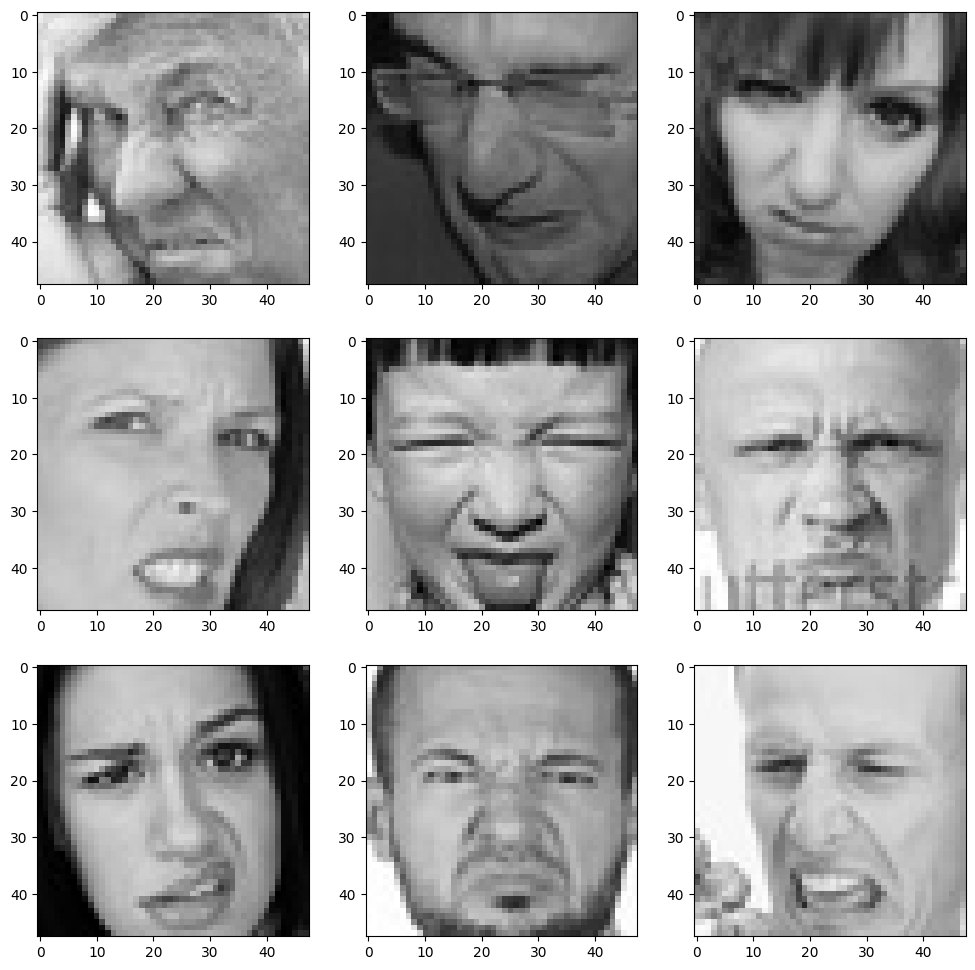

In [9]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [10]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [11]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [15]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [16]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

/tmp/ipykernel_32/3853974908.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/5
225/225 [==============================] - 837s 4s/step - loss: 1.7681 - accuracy: 0.3189 - val_loss: 1.9498 - val_accuracy: 0.3136 - lr: 0.0010
Epoch 2/5
225/225 [==============================] - 823s 4s/step - loss: 1.4180 - accuracy: 0.4534 - val_loss: 1.4595 - val_accuracy: 0.4543 - lr: 0.0010
Epoch 3/5
225/225 [==============================] - 854s 4s/step - loss: 1.2646 - accuracy: 0.5175 - val_loss: 1.5628 - val_accuracy: 0.3903 - lr: 0.0010
Epoch 4/5
225/225 [==============================] - 813s 4s/step - loss: 1.1794 - accuracy: 0.5497 - val_loss: 1.1736 - val_accuracy: 0.5597 - lr: 0.0010
Epoch 5/5
225/225 [==============================] - 815s 4s/step - loss: 1.1227 - accuracy: 0.5723 - val_loss: 1.1394 - val_accuracy: 0.5706 - lr: 0.0010


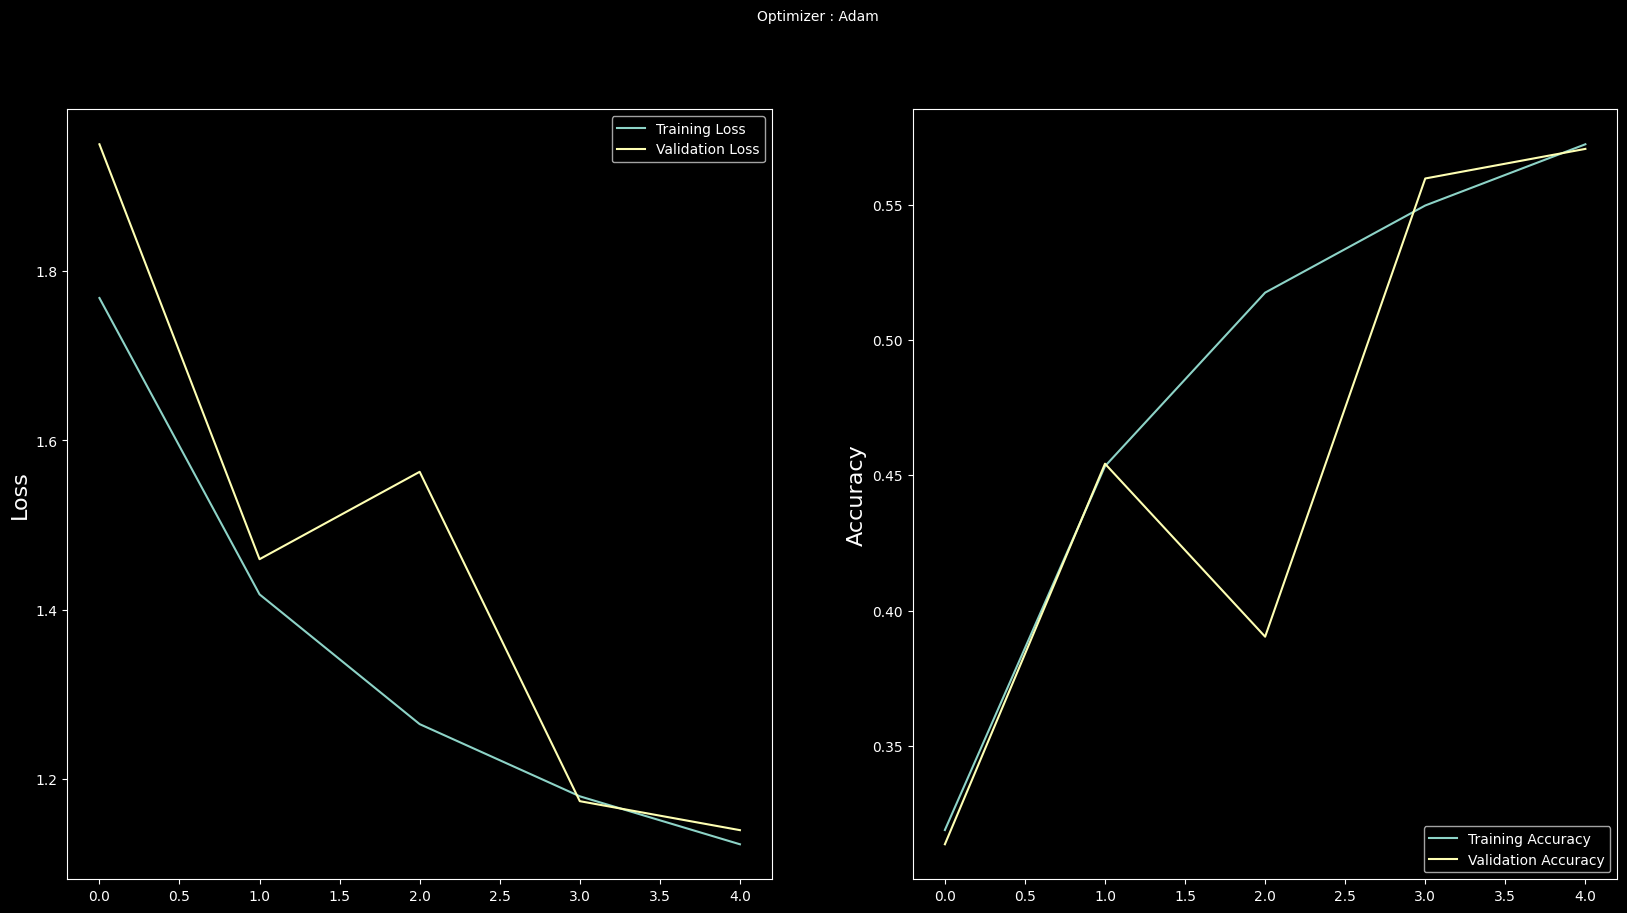

In [17]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [31]:
# Training and evaluation code (epochs, loss, accuracy, etc.)

# Load an image for prediction
image_path = "/kaggle/input/sad-human-face"  # Replace with the path to the image you want to predict
img = load_img(image_path, target_size=(picture_size, picture_size), color_mode="grayscale")
img_array = img_to_array(img)
img_array = img_array / 255.0  # Normalize the image

# Expand the dimensions to match the input shape of the model
img_array = np.expand_dims(img_array, axis=0)

# Make a prediction using the trained model
predictions = model.predict(img_array)

# Get the class label with the highest probability
predicted_class = np.argmax(predictions)

# Map the class label to an emotion (assuming a mapping from class index to emotion)
emotion_mapping = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}
predicted_emotion = emotion_mapping[predicted_class]

# Display the predicted emotion
print(f"Predicted Emotion: {predicted_emotion}")


IsADirectoryError: [Errno 21] Is a directory: '/kaggle/input/sad-human-face'

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


56/56 [==============================] - 45s 804ms/step


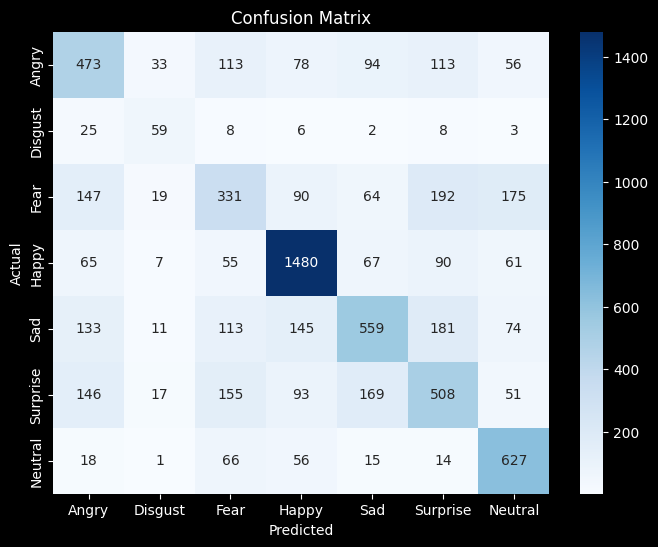

              precision    recall  f1-score   support

       Angry       0.47      0.49      0.48       960
     Disgust       0.40      0.53      0.46       111
        Fear       0.39      0.33      0.36      1018
       Happy       0.76      0.81      0.78      1825
         Sad       0.58      0.46      0.51      1216
    Surprise       0.46      0.45      0.45      1139
     Neutral       0.60      0.79      0.68       797

    accuracy                           0.57      7066
   macro avg       0.52      0.55      0.53      7066
weighted avg       0.56      0.57      0.56      7066



In [21]:
# ... (your existing code for training and evaluation)

# Confusion Matrix
Y_pred = model.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_set.classes

cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=emotion_mapping.values(), yticklabels=emotion_mapping.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=emotion_mapping.values()))


In [23]:
from sklearn.metrics import classification_report


In [24]:
# Calculate predictions
Y_pred = model.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_set.classes

# Generate and display the classification report
class_names = list(emotion_mapping.values())
report = classification_report(y_true, y_pred, target_names=class_names)

print(report)


56/56 [==============================] - 45s 807ms/step
              precision    recall  f1-score   support

       Angry       0.47      0.49      0.48       960
     Disgust       0.40      0.53      0.46       111
        Fear       0.39      0.33      0.36      1018
       Happy       0.76      0.81      0.78      1825
         Sad       0.58      0.46      0.51      1216
    Surprise       0.46      0.45      0.45      1139
     Neutral       0.60      0.79      0.68       797

    accuracy                           0.57      7066
   macro avg       0.52      0.55      0.53      7066
weighted avg       0.56      0.57      0.56      7066



In [25]:
from sklearn.metrics import roc_curve, roc_auc_score


56/56 [==============================] - 48s 856ms/step


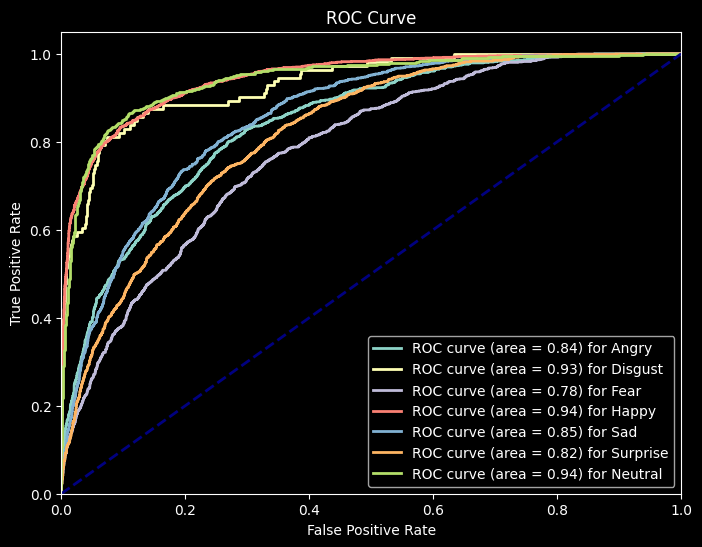

ValueError: multi_class must be in ('ovo', 'ovr')

In [26]:
# Calculate predictions
Y_pred = model.predict(test_set)
y_true = test_set.classes
n_classes = len(emotion_mapping)

# Initialize arrays to store the ROC curves and AUCs
fpr = {}
tpr = {}
roc_auc = {}

# Calculate ROC and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_true == i).astype(int), Y_pred[:, i])
    roc_auc[i] = roc_auc_score((y_true == i).astype(int), Y_pred[:, i])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for {emotion_mapping[i]}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate the micro-average AUC
micro_roc_auc = roc_auc_score(y_true, Y_pred, average="micro")

print(f"Micro-average AUC: {micro_roc_auc:.4f}")


In [32]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

# Load the unknown image for prediction
unknown_image_path = "/kaggle/input/sad-human-face"  # Replace with the path to your unknown image
img = load_img(unknown_image_path, target_size=(picture_size, picture_size), color_mode="grayscale")
img_array = img_to_array(img)
img_array = img_array / 255.0  # Normalize the image

# Expand the dimensions to match the input shape of the model
img_array = np.expand_dims(img_array, axis=0)

# Make a prediction using the trained model
predictions = model.predict(img_array)

# Get the class label with the highest probability
predicted_class = np.argmax(predictions)

# Map the class label to an emotion (assuming a mapping from class index to emotion)
emotion_mapping = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}
predicted_emotion = emotion_mapping[predicted_class]

# Display the predicted emotion for the unknown image
print(f"Predicted Emotion for Unknown Image: {predicted_emotion}")


IsADirectoryError: [Errno 21] Is a directory: '/kaggle/input/sad-human-face'

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np